# Análise de dados Spotify

Mini projeto para a análise do dataset de músicas do spotify descrito a seguir.

**Feature Explanations**
Dataset contains 19.000 songs and has 15 features like duration ms, key, audio mode, acousticness, danceability, energy and so on .

**duration_ms**: The duration of the track in milliseconds.

**key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

**audio_mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**time_signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

**acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

**instrumentalness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

**speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.

**audio_valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
**tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**song_popularity**: Song ratings of spotify audience.

**liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

## Importando bibliotecas e dataset

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style('darkgrid')

In [43]:
df = pd.read_csv('spotify.csv', index_col=0)
df.set_index('song_name', inplace=True)

## Análise inicial do dataset

In [44]:
df.head(10)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_name,,,,,,,,,,,,,,
Boulevard of Broken Dreams,73,262333,0.005520000000000001kg,0.496mol/L,0.682,2.94e-05,8.0,0.0589,-4.095,1,0.0294,167.06,4,0.474
In The End,66,216933,0.0103kg,0.542mol/L,0.853,0.0,3.0,0.108,-6.407,0,0.0498,105.256,4,0.370
Seven Nation Army,76,231733,0.00817kg,0.737mol/L,0.463,0.447,0.0,0.255,-7.8279999999999985,1,0.0792,123.881,4,0.324
By The Way,74,216933,0.0264kg,0.451mol/L,0.97,0.00355,0.0,0.102,-4.938,1,0.107,122.444,4,0.198
How You Remind Me,56,223826,0.000954kg,0.447mol/L,0.7659999999999999,0.0,10.0,0.113,-5.065,1,0.0313,172.011,4,0.574
Bring Me To Life,80,235893,0.00895kg,0.316mol/L,0.945,1.85e-06,4.0,0.396,-3.169,0,0.124,189.931,4,0.320
Last Resort,81,199893,0.000504kg,0.581mol/L,0.887,0.00111,4.0,0.268,-3.659,0,0.0624,90.578,4,0.724
Are You Gonna Be My Girl,76,213800,0.00148kg,0.613mol/L,0.953,0.000582,2.0,0.152,-3.435,1,0.0855,105.046,4,0.537
Mr. Brightside,80,222586,0.00108kg,0.33mol/L,0.936,0.0,1.0,0.0926,-3.66,1,0.0917,148.112,4,0.234


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18835 entries, Boulevard of Broken Dreams to Up to Me
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  object 
 1   song_duration_ms  18835 non-null  object 
 2   acousticness      18835 non-null  object 
 3   danceability      18835 non-null  object 
 4   energy            18835 non-null  object 
 5   instrumentalness  18835 non-null  object 
 6   key               18835 non-null  float64
 7   liveness          18835 non-null  object 
 8   loudness          18835 non-null  object 
 9   audio_mode        18835 non-null  object 
 10  speechiness       18835 non-null  object 
 11  tempo             18835 non-null  object 
 12  time_signature    18835 non-null  object 
 13  audio_valence     18834 non-null  float64
dtypes: float64(2), object(12)
memory usage: 2.2+ MB


Apesar de as features serem apresentadas como sendo de natureza numérica, percebemos que quase todas são definidas como strings(`object`) com exceção de *audio_valence* e *key*. Também notamos como algumas features apresentam unidades erradas(*acousticness* e *danceability*).

## Limpeza de dados

Precisamos transformar os dados do tipo `object` em dados numéricos ou categóricos de acordo com sua funcionalidade. Para isso, precisamos eliminar os dados faltantes que, examinando o dataset, estão representados como `nao_sei`.

Antes de mudarmos os dados para numéricos, precisamos garantir que estão todos limpos de caracteres que não representem números.

In [46]:
df['song_popularity'].replace('nao_sei', None, inplace=True)
df['song_popularity'] = df['song_popularity'].astype('int')

In [47]:
df['song_duration_ms'].replace('nao_sei', None, inplace=True)
df['song_duration_ms'] = df['song_duration_ms'].str.strip('kg')
df['song_duration_ms'] = df['song_duration_ms'].astype('float')

In [48]:
df['acousticness'].replace('nao_sei', None, inplace=True)
df['acousticness'] = df['acousticness'].str.strip('kgmol/L')
df['acousticness'] = df['acousticness'].astype('float')

In [49]:
df['danceability'].replace('nao_sei', None, inplace=True)
df['danceability'] = df['danceability'].str.strip('kgmol/L')
df['danceability'] = df['danceability'].astype('float')

In [50]:
df['energy'].replace('nao_sei', None, inplace=True)
df['energy'] = df['energy'].astype('float')

In [51]:
df['instrumentalness'].replace('nao_sei', None, inplace=True)
df['instrumentalness'] = df['instrumentalness'].astype('float')

In [52]:
df['liveness'].replace('nao_sei', None, inplace=True)
df['liveness'] = df['instrumentalness'].astype('float')

In [53]:
df['loudness'].replace('nao_sei', None, inplace=True)
df['loudness'] = df['loudness'].astype('float')

In [54]:
df['audio_mode'].replace('nao_sei', None, inplace=True)
df.dropna()
df['audio_mode'] = df['audio_mode'].astype('object')

In [55]:
df['speechiness'].replace('nao_sei', None, inplace=True)
df['speechiness'] = df['speechiness'].str.strip('nao_sei')
df['speechiness'] = df['speechiness'].astype('float')

In [56]:
df['tempo'].replace('nao_sei', None, inplace=True)
df['tempo'] = df['tempo'].astype('float')

In [57]:
df['time_signature'].replace('nao_sei', None, inplace=True)
df['time_signature'] = df['time_signature'].astype('float')

In [58]:
df['key'].replace('nao_sei', None, inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18835 entries, Boulevard of Broken Dreams to Up to Me
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  float64
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  float64
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  object 
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  float64
 13  audio_valence     18834 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 2.8+ MB


In [60]:
df.dropna(inplace=True)
df.isna().any()

song_popularity     False
song_duration_ms    False
acousticness        False
danceability        False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
audio_mode          False
speechiness         False
tempo               False
time_signature      False
audio_valence       False
dtype: bool

## Análise de dados categóricos

`audio_mode` representa a escala de que se deriva a melodia da música. Sendo que 1 representa *major* e 0 representa *minor*.

In [70]:
df.audio_mode.describe()

count     18834
unique        2
top       major
freq      11830
Name: audio_mode, dtype: object

In [62]:
df['audio_mode'].replace('0', 'minor', inplace=True) #substitui 0 por 'minor'
df['audio_mode'].replace('1', 'major', inplace=True) #substitui 1 por 'major'

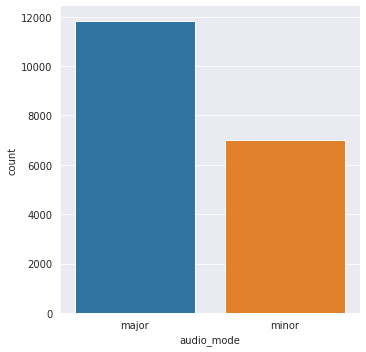

In [63]:
sns.catplot('audio_mode', data=df, kind='count')
plt.show()

Vemos como a maiorira das músicas no dataset estão na escala *major*. A teoria nos diz que, em geral, músicas nessa escala soam mais 'felizes' e músicas em escala 'minor' soam mais 'tristes'. No nosso dataset, a feature que define essa característica é `audio_valence`. Com ela podemos averiguar a validade da teoria.

<Figure size 720x504 with 0 Axes>

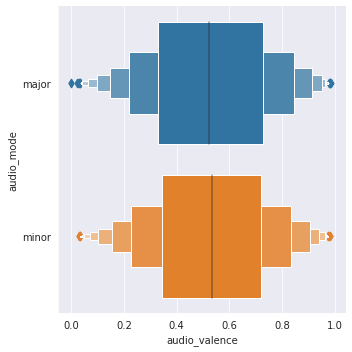

In [69]:
plt.figure(figsize=(10,7))
sns.catplot('audio_valence', 'audio_mode', data=df, kind='boxen')
plt.show()

Apesar do que a teoria nos diz, a escala da música não parece afetar de forma significativa sua valência. O que o gráfico acima nos mostra é que há uma distribuição bem uniforme da valência das entradas quanto a sua escala.